In [77]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import itertools
import csv
import random
import math
import pandas as pd

# Q1

(a) Given 
$$A= 
\begin{pmatrix}
-12 & 1 & 13\\
-5 & 3 & 5\\
-10 & 1 & 11
\end{pmatrix}, \quad
\textbf{b}=\begin{pmatrix}
13\\2\\11
\end{pmatrix}$$

In [4]:
A = np.array([[-12, 1, 13], [-5, 3, 5], [-10, 1, 11]])
b = np.array([[13], [2], [11]])
S = A.T.dot(A)
h = A.T.dot(b)
print('S = \n', S)
print('h = \n', h)

S = 
 [[ 269  -37 -291]
 [ -37   11   39]
 [-291   39  315]]
h = 
 [[-276]
 [  30]
 [ 300]]


$S$ is symmetric iff $S^T=S$. 

$S$ is positive definite iff iff all the eigenvalues of $S$ are positive.

In [7]:
print('S is symmetric: ', np.allclose(S, S.T))
print('S is positive definite: ', np.all(np.linalg.eigvals(S) > 0))

S is symmetric:  True
S is positive definite:  True


(b) Use the conjugate method to solve the equation $S\bold{x}=\bold{h}$.

In [24]:
def f(S, x):
    return S.dot(x)


def conj_grad(A, x):
    steps = [(x[:, 0])]
    r = h - A.dot(x)
    p = r
    res = [r]
    conj = [p]
    rsold = r.T.dot(r)
    for i in range(0, 3):
        # Update the steps
        Ap = A.dot(p)
        alpha = rsold / p.T.dot(Ap)
        x = x + alpha * p
        r = r - alpha * Ap
        rsnew = r.T.dot(r)
        p = r + (rsnew / rsold) * p
        rsold = rsnew

        # Save the steps
        steps.append((x[:, 0]))
        res.append(rsnew)
        conj.append(p)
    return x, steps, res, conj


In [28]:
x0 = np.array([[2], [1], [1]])
x, steps, res, conj = conj_grad(S, x0)
print('x = {}'.format(x[:, 0]))


x = [ 1. -1.  2.]


(c)

In [33]:
for i in range(0, 3):
    print('P^T_{}SP_{} = {}'.format(
        i, i+1, conj[i].T.dot(S.dot(conj[i+1]))[0, 0]))


P^T_0SP_1 = -1.4879333321005106e-08
P^T_1SP_2 = -4.485013882092777e-12
P^T_2SP_3 = -2.5810682089614633e-19


Indeed, $P^{T}_{i} S P_{i+1} = 0$  for each $i = 0, 1, 2 $ (with small deviations due to floating point errors).

# Q2

In [44]:
N = 100
random.seed


def location_E(t):
    return - (9.81/2)*(t*(1+0.2*(random.random()-0.5)*2))**2+5*(random.random()-0.5)*2


def location_M(t):
    return - (1.62/2)*(t*(1+0.2*(random.random()-0.5)*2))**2+5*(random.random()-0.5)*2


with open('gravity_location_data.csv', mode='w') as gravity_file:
    gravity_writer = csv.writer(
        gravity_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    gravity_writer.writerow(['time', 'location', 'Earth/Moon'])
    for i in range(N):
        time = random.uniform(0, 5)
        gravity_writer.writerow([time, location_E(time), 'Earth'])
    for i in range(N):
        time = random.uniform(0, 5)
        gravity_writer.writerow([time, location_M(time), 'Moon'])


In [42]:
df = pd.read_csv('gravity_location_data.csv')
# if Earth, 0, if Moon, 1
df['Earth/Moon'] = np.where(df['Earth/Moon'] == 'Earth', 0, 1)


In [64]:
# Logistic regression
class LR:
    def __init__(self, x, y):
        # Generate X, theta, and y
        self.X = np.concatenate(((x[:,0]**2).reshape(2*N, 1), x[:, 1].reshape(2*N, 1)), axis=1)
        self.X = np.c_[np.ones((len(self.X), 1)), self.X]
        self.theta = np.zeros((self.X.shape[1], 1))
        self.y = y

    # Computes the gradient of the cost function at the point theta
    def gradient(self):
        m = self.X.shape[0]
        sigmoid = 1 / (1 + np.exp(-np.dot(self.X, self.theta)))
        return (1 / m) * np.dot(self.X.T, sigmoid-self.y)

    # Performs gradient descent to learn theta
    def fit(self, n_iter=1000):
        alpha = 0.5
        I = int(n_iter/3)
        for i in range(n_iter):
            # Reduce the learning rate by half every n_iter/3 iterations
            if i % I == 0:
                alpha /= 2
            self.theta = self.theta-alpha*self.gradient()
        return self.theta

In [65]:
n_iter = 1000  # number of iterations
model = LR(df[['time', 'location']].to_numpy(), df['Earth/Moon'].to_numpy().reshape(2*N,1))
w = model.fit(n_iter)
print('w = \n', w)

w = 
 [[0.58286795]
 [1.23991095]
 [0.57065764]]


In [66]:
x = np.arange(0,5,0.1)
y = -(w[1]/w[2])*x**2 - w[0]/w[2]

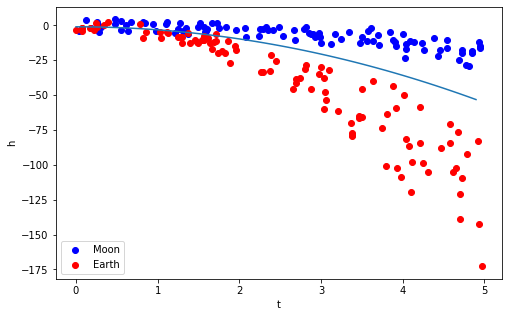

In [68]:
fig, ax = plt.subplots(figsize=(8, 5))
A = df.loc[df['Earth/Moon'] == 1]
B = df.loc[df['Earth/Moon'] == 0]
ax.scatter(A['time'], A['location'], label='Moon', c='b')
ax.scatter(B['time'], B['location'], label='Earth', c='r')
plt.plot(x,y)
plt.xlabel('t')
plt.ylabel('h')
plt.legend()
plt.show()

# Q3

In [69]:
!git clone https://github.com/LeoisWTT/PHYS3151-Machine-Learning-in-Physics-2023

Cloning into 'PHYS3151-Machine-Learning-in-Physics-2023'...


In [149]:
# spin configurations
df1 = pd.read_csv("./PHYS3151-Machine-Learning-in-Physics-2023/Exam/dataset/AF_conf.csv",header=None) 
# temperature
df2 = pd.read_csv("./PHYS3151-Machine-Learning-in-Physics-2023/Exam/dataset/AF_temp.csv",header=None)
df1 = df1.to_numpy()
df2 = df2.to_numpy()
x = df1
t = df2
t = t.T

In [150]:
cov = np.cov(x, rowvar=False)
U, sigma, VT = la.svd(cov) # sigma is eigenvalue, U is eigenvector


In [151]:
def reduce_system(U, dimension):
    U_reduced = U[:, :dimension]
    reduced_vec = np.dot(z, U_reduced)
    var = np.sum(sigma[:dimension])/np.sum(sigma[:])
    return reduced_vec, var

C:\Users\12568\AppData\Local\Temp\ipykernel_10356\2370909818.py:7: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cb = fig.colorbar(p)


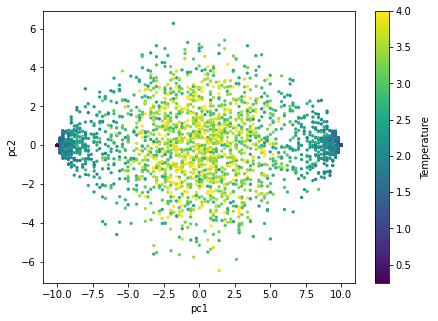

In [152]:
reduced_vec, vari = reduce_system(U, 2)

fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(reduced_vec[:, 0], reduced_vec[:, 1], c=t, s=5, cmap='viridis')
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
cb = fig.colorbar(p)
cb.set_label(label='Temperature', labelpad=10)
plt.show()


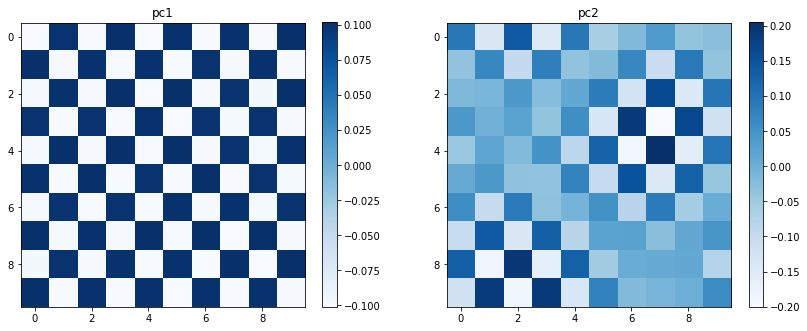

In [171]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 7))
ax1, ax2 = axes

im1 = ax1.imshow(U[:, 0].reshape(10, 10).T, cmap='Blues')
im2 = ax2.imshow(U[:, 1].reshape(10, 10).T, cmap='Blues')

fig.colorbar(im1, ax=ax1, shrink=0.75)
fig.colorbar(im2, ax=ax2, shrink=0.75)
ax1.set_title('pc1')
ax2.set_title('pc2')
plt.show()

In [153]:
def K_mean(pc, K=3, jmax=10):
    # step 1 - choose 3 clusters at random
    # step 2 - select random point as centroids
    a = random.sample(range(0, len(pc)-1), K)
    Centroids = np.zeros((K, 2))
    # print(a)
    for i in range(K):
        Centroids[i, 0] = pc[a[i]][0]
        Centroids[i, 1] = pc[a[i]][1]
    diff = 1
    j = 0
    Centroids = pd.DataFrame(Centroids)
    Centroids.columns = ['pc1', 'pc2']
    principalComponents = pd.DataFrame(pc)
    principalComponents.columns = ['pc1', 'pc2']
    while (diff != 0):
        XD = principalComponents
        i = 1
# step 3 - assign all the points to the closest cluster centroid
        for index1, row_c in Centroids.iterrows():
            ED = []
            for index2, row_d in XD.iterrows():
                d1 = (row_c["pc1"] - row_d["pc1"])**2
                d2 = (row_c["pc2"] - row_d["pc2"])**2
                d = np.sqrt(d1+d2)
                ED.append(d)
            principalComponents[i] = ED
            i = i + 1

        C = []
        for index, row in principalComponents.iterrows():
            min_dist = row[1]
            pos = 1
            for i in range(K):
                if row[i+1] < min_dist:
                    min_dist = row[i+1]
                    pos = i + 1
            C.append(pos)
        principalComponents["Cluster"] = C
# step 4 - recomput centroids of newly formed clusters
        Centroids_new = principalComponents.groupby(
            ["Cluster"]).mean()[["pc2", "pc1"]]
# step 5 - repeat 3 and 4
        if j == 0:
            diff = 1
            j = j+1
        elif j < jmax:
            diff = ((Centroids_new['pc2'] - Centroids['pc2'])**2).sum() + \
                ((Centroids_new['pc1'] - Centroids['pc1'])**2).sum()
            print(diff.sum())
            j = j+1
        else:
            diff = ((Centroids_new['pc2'] - Centroids['pc2'])**2).sum() + \
                ((Centroids_new['pc1'] - Centroids['pc1'])**2).sum()
            print('force exit with diff=', diff.sum())
            diff = 0
        Centroids = principalComponents.groupby(
            ["Cluster"]).mean()[["pc2", "pc1"]]
    return principalComponents, Centroids


In [154]:
K=3
a = random.sample(range(0, len(x)-1), K)
Centroids = np.zeros((K,2))
for i in range(K):
  Centroids[i,0] = x[a[i],0]
  Centroids[i,1] = x[a[i],1]

In [155]:
pc = reduced_vec.tolist()
Centroids = Centroids.tolist()
principalComponents = pd.DataFrame(pc)
Centroids = pd.DataFrame(Centroids)

In [156]:
principalComponents, Centroids = K_mean(pc, 3)


18.66827559606502
1.6992981211891829
0.2814608391508584
0.02823563457269187
0.009486195349252935
0.0


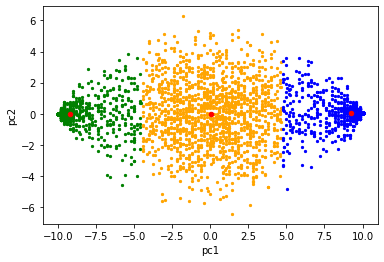

In [172]:
color=['green','orange','blue']
for k in range(K):
    data=principalComponents[principalComponents["Cluster"]==k+1]
    plt.scatter(data["pc1"],data["pc2"],c=color[k], s=5, cmap='viridis')
plt.scatter(Centroids["pc1"],Centroids["pc2"],c='red', s=20)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

# Q4

In [307]:
df3 = pd.read_csv("./PHYS3151-Machine-Learning-in-Physics-2023/Exam/dataset/NN_data.csv", sep=",")


In [308]:
# Standardize the data
df3[['1st_exam', '2nd_exam']] = (df3[['1st_exam', '2nd_exam']] - np.mean(df3[['1st_exam', '2nd_exam']], axis=0)) / np.std(df3[['1st_exam', '2nd_exam']], axis=0, ddof=0)

print('Standardized data: \n', df3)


Standardized data: 
     1st_exam  2nd_exam  admitted
0  -1.602248  0.638341         0
1  -1.826256 -1.207541         0
2  -1.539040  0.361294         0
3  -0.282101  1.086368         1
4   0.691528  0.493378         1
..       ...       ...       ...
95  0.921707 -0.964957         1
96 -1.207735  1.129382         1
97  1.739129  0.138100         1
98 -0.532226 -0.069772         1
99  0.471658  1.260588         1

[100 rows x 3 columns]


In [322]:
class Network(object):
    # The list 'sizes' contains the number of neurons in the respective layers.
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.biases = [np.random.rand(y, 1) for y in sizes[1:]]
        self.weights = [np.random.rand(y, x)/np.sqrt(x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def forwardprop(self, a):
        self.activations = [a]  # list to store all the activations, layer by layer
        self.zs = []            # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, a) + b
            self.zs.append(z)
            a = sigmoid(z)
            self.activations.append(a)
        self.predict = np.where(self.activations[-1] > 0.5, 1, 0)

    # Train the neural network using mini-batch gradient descent.
    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data):
        X, Y = training_data
        n = X.shape[1]
        cost = []
        accuracy_train = []
        accuracy_test = []

        I = int(epochs/4)
        for j in range(epochs):
            # Shuffle the data
            X, Y = shuffle(X, Y, n)

            if j+1 % I == 0:
                eta /= 1.3

            for k in range(0, n, mini_batch_size):
                self.update(X[:, k:k+mini_batch_size],
                            Y[:, k:k+mini_batch_size], eta)
            accuracy_train.append(self.evaluate((X, Y)))
            cost.append(self.quadratic_cost(X, Y))
            accuracy_test.append(self.evaluate(test_data))

        return cost, accuracy_train, accuracy_test

    # update the network's weights and biases by applying gradient descent
    def update(self, x, y, eta):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        m = x.shape[1]

        # forward propogation
        self.forwardprop(x)

        # backward propogation
        delta = (self.activations[-1]-y)*sigmoid_prime(self.zs[-1])
        nabla_b[-1] = np.sum(delta, axis=1, keepdims=True)
        nabla_w[-1] = np.dot(delta, self.activations[-2].T)
        for l in range(2, self.num_layers):
            delta = np.dot(self.weights[-l+1].T,
                           delta) * sigmoid_prime(self.zs[-l])
            nabla_b[-l] = np.sum(delta, axis=1, keepdims=True)
            nabla_w[-l] = np.dot(delta, self.activations[-l-1].T)

        # update the weights and biases
        self.weights = [w-(eta/m)*nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/m)*nb for b, nb in zip(self.biases, nabla_b)]

    def evaluate(self, data):
        x, y = data
        self.forwardprop(x)
        return 100-np.sum(abs(self.predict-y))/y.shape[1]*100

    def quadratic_cost(self, x, y):
        return np.sum((self.activations[-1]-y)**2)/y.shape[1]


# Miscellaneous functions
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))


def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))


def shuffle(x, y, n):
    permutation = list(np.random.permutation(n))
    x = x[:, permutation]
    y = y[:, permutation].reshape((1, n))
    return x, y



In [310]:
x = df3[['1st_exam', '2nd_exam']].to_numpy().T
y = df3['admitted'].to_numpy().reshape((1, n))
n = x.shape[1]

# Shuffle the data
X, Y = shuffle(x, y, n)


training_data = (X[:, :int(0.8*n)], Y[:, :int(0.8*n)])
test_data = (X[:, int(0.8*n):], Y[:, int(0.8*n):])

In [349]:
epochs = 1000
mini_batch_size = 5
eta = 2

In [350]:
net = Network([2,3,1])

In [351]:
cost, train, test = net.SGD(
        training_data, epochs, mini_batch_size, eta, test_data)


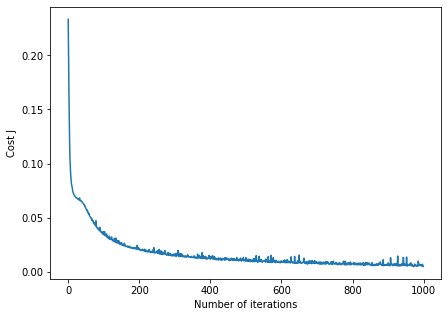

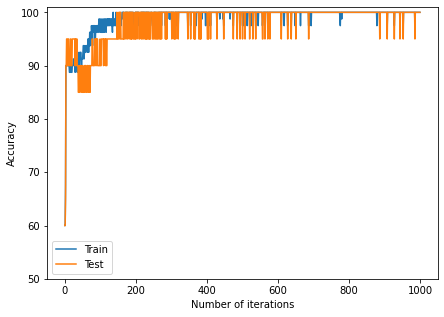

In [352]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))


ax.plot(cost)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Cost J')

fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.plot(train, label='Train')
ax.plot(test, label='Test')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Accuracy')
ax.legend()
ax.set_ylim(50, 101)
plt.show()
